<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Extens%C3%A3o-DS/04%20-%20SVM/T%C3%B3pico%2003%20-%20Aprendizado%20Supervisionado%20-%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial SVM

O SVM é um algoritmo de aprendizado supervisionado que aprende a classificar amostras em diferentes classes usando um hiperplano como separador de decisão. O objetivo do SVM é encontrar o hiperplano que melhor separa as amostras de diferentes classes, maximizando a margem entre elas.

Este código ilustra os conceitos exemplificados na aula expositiva.

Abaixo ilustra-se o SVM:

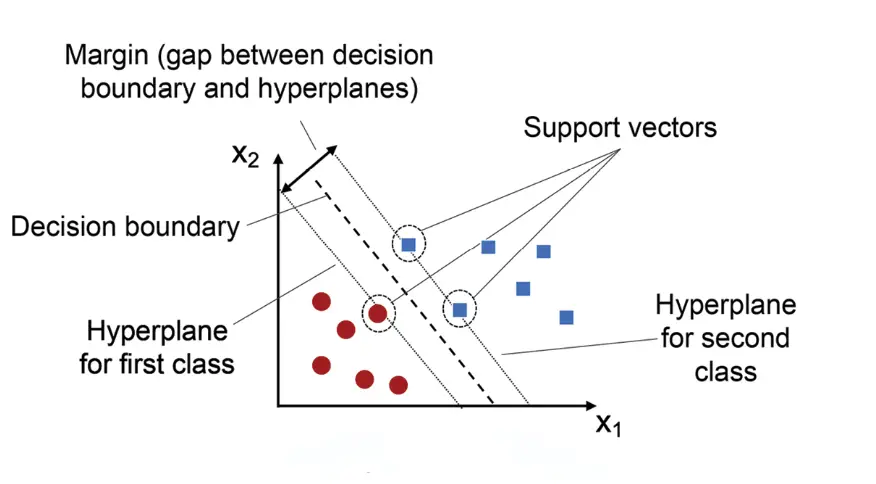

In [1]:
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC as SVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


random_seed=9999

#Dataset sintético

In [2]:


#centro de massa da distribuição
centers = [[3, 3], [-3, -3], [0, 0]]
n_classes = len(centers)

#criação da distribuição (300 instâncias 2 features)
data, labels = make_blobs(n_samples=1000, n_features=2,
                          centers=np.array(centers),
                          random_state=random_seed)

for sample, label in zip(data[:10],labels[:10]):
  print(sample, label)


[-1.63783895  0.30649208] 2
[-1.0264269  -1.21410542] 2
[-2.63638929 -2.75667676] 1
[-1.70371812 -2.38779121] 1
[-2.56034405 -3.75859679] 1
[-4.25534977 -3.01520198] 1
[1.73381416 5.01766574] 0
[1.8254288  3.26159488] 0
[4.41734977 4.25089434] 0
[-0.71594871  0.79510033] 2


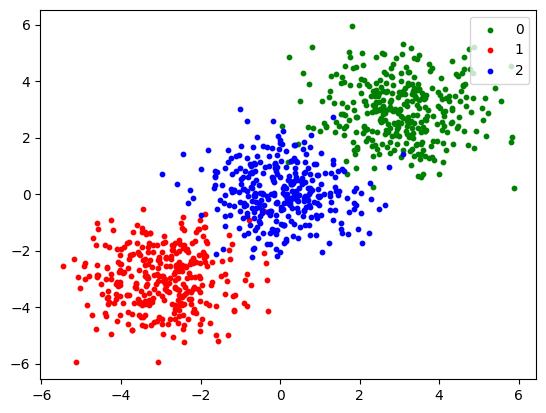

In [3]:
#Exibição
colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

##Holdout (Train-Val | Test)

In [15]:
#70% treino - 30% test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)

#Porção do treinamento fica para validação (70-30)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=random_seed)



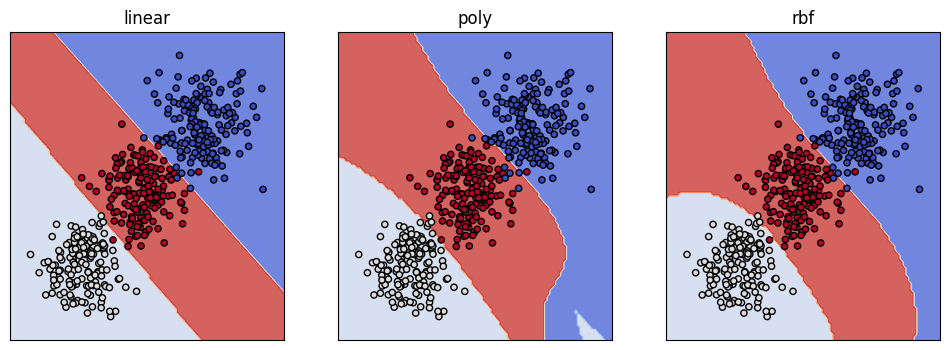

In [16]:
fig, sub = plt.subplots(1, 3, figsize=(12,4))

X0, X1 = train_data[:, 0], train_data[:, 1]

for kernel, ax in zip(['linear','poly','rbf'], sub.flatten()):

    clf = SVM(C=1.0,kernel=kernel)
    clf.fit(train_data,train_labels)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        train_data,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )

    ax.scatter(X0, X1, c=train_labels, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(kernel)

plt.show()

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       101
           1       0.99      0.93      0.96       101
           2       0.91      0.98      0.95        98

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300



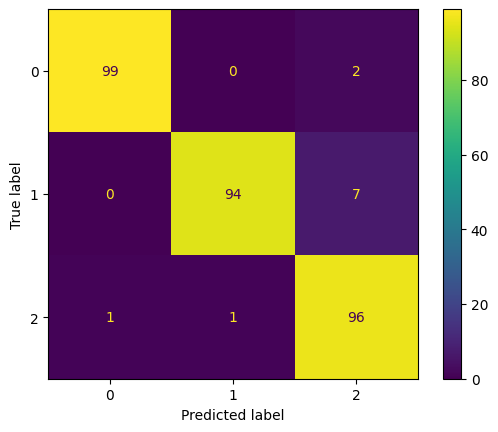

In [6]:
clf = SVM(C=1.0,kernel='rbf')
clf.fit(train_data,train_labels)

y_pred = clf.predict(test_data)

print(classification_report(test_labels,y_pred))
cm = confusion_matrix(test_labels, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

#Teste do modelo

#Analisando Impacto do Parametro C em Diferentes Kernels

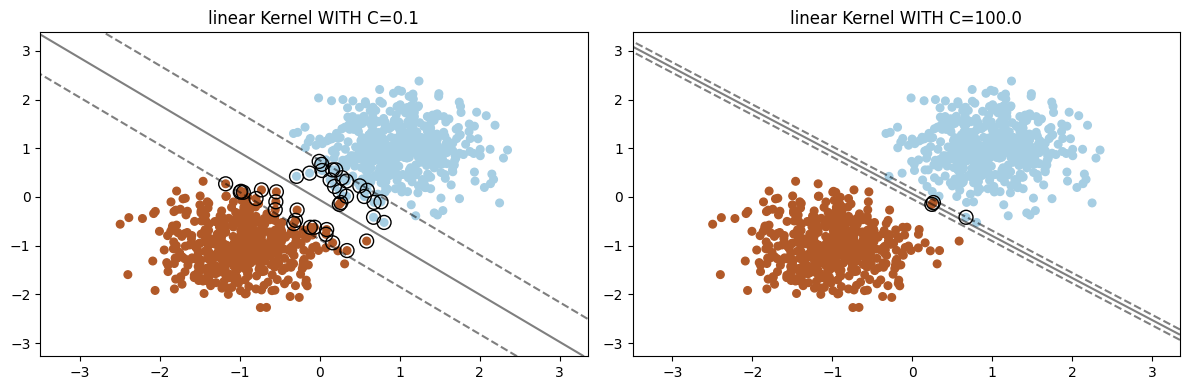

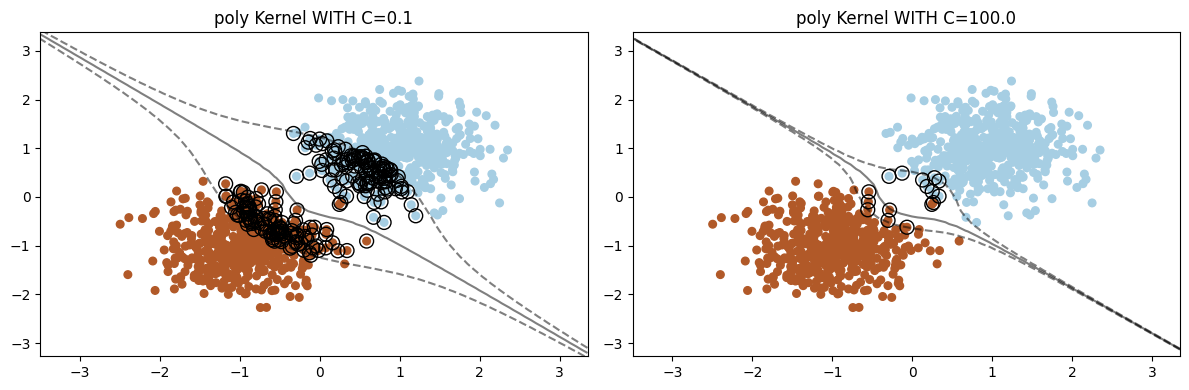

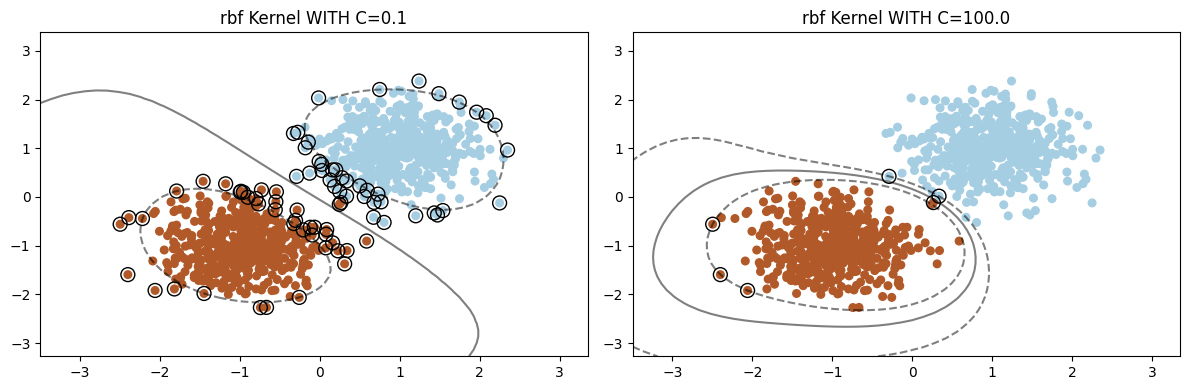

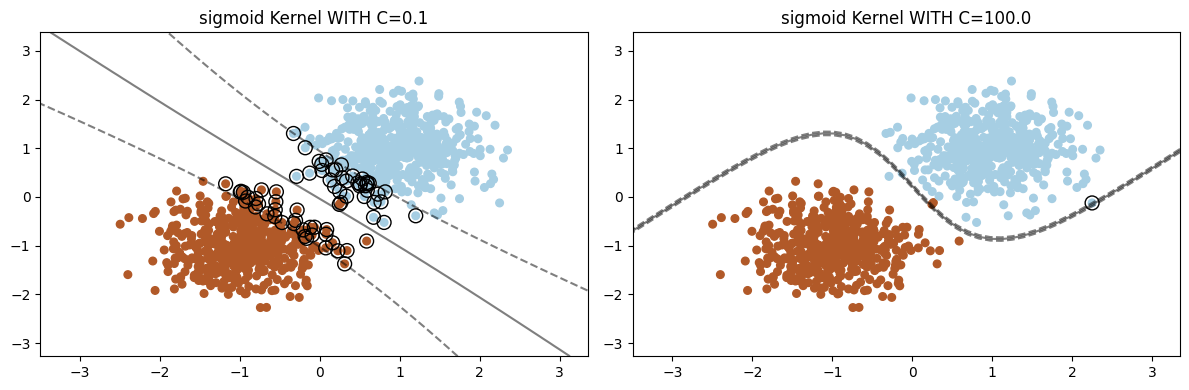

In [7]:


centers = [[1, 1],[-1,-1]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.5, random_state=0)

#centers = [[3, 5],[6,1]]
#X, y = make_blobs(n_samples=150, centers=centers, cluster_std=1.1, random_state=0)

for kernel in ['linear','poly','rbf','sigmoid']:
  plt.figure(figsize=(12, 4))
  for i, C in enumerate([0.1,100.0]):
      # "hinge" is the standard SVM loss
      clf = SVM(C=C, random_state=42,kernel=kernel).fit(X, y)
      # obtain the support vectors through the decision function
      decision_function = clf.decision_function(X)
      # we can also calculate the decision function manually
      # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
      # The support vectors are the samples that lie within the margin
      # boundaries, whose size is conventionally constrained to 1
      support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
      support_vectors = X[support_vector_indices]

      plt.subplot(1, 2, i + 1)
      plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
      ax = plt.gca()
      DecisionBoundaryDisplay.from_estimator(
          clf,
          X,
          ax=ax,
          grid_resolution=50,
          plot_method="contour",
          colors="k",
          levels=[-1, 0, 1],
          alpha=0.5,
          linestyles=["--", "-", "--"],
      )
      plt.scatter(
          support_vectors[:, 0],
          support_vectors[:, 1],
          s=100,
          linewidth=1,
          facecolors="none",
          edgecolors="k",
      )
      plt.title(f'{kernel} Kernel WITH C={str(C)}')
  plt.tight_layout()
  plt.show()

#Dados Desbalanceados

In [8]:
def plot_dataset(X,y,dataset_name='Dataset',print_info=True,print_class_dist=True,print_dataset_dist=True):

  #Converto para pandas dataframe para facilitar a manipulação
  df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
  df['class'] = y

  if print_info:
    print(f"##### Vetores de Características - {dataset_name} #####")
    df.info()
    #Shuffle e mostra os primeiros 10 elementos
    print(df.sample(frac = 1).head(10))


  if print_class_dist:
    print("#######################################")
    # Criando o gráfico de barras com Matplotlib
    counts = df["class"].value_counts()
    plt.figure(figsize=(5,4))
    plt.bar(counts.index, counts.values,color=['red','green','blue'])

    # Adicionando um título e rótulos de eixo
    plt.xlabel("Classes")
    plt.xticks([0,1,2])
    plt.ylabel("#Amostras")
    plt.title(f'Distribuição das Classes - {dataset_name}')
    # Mostrando o gráfico
    plt.show()

  if print_dataset_dist:
    print("#######################################")
    # Configurando o gráfico
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.75)
    plt.show()

    print("#######################################")

##### Vetores de Características - Sintetico - 3 Features - 3 Classes #####
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  2000 non-null   float64
 1   feature_2  2000 non-null   float64
 2   class      2000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 39.2 KB
      feature_1  feature_2  class
1393   0.456422   2.445427      0
1885  -0.064614  -0.135689      2
118    0.518134   0.986192      0
997   -0.581247  -0.828802      0
1949  -1.160747  -0.791945      0
772   -0.271411   1.614980      0
1663  -0.310414   2.278728      0
1624  -0.283034  -0.735029      0
1588  -1.279694  -0.421484      0
50    -0.228945  -0.354219      0
#######################################


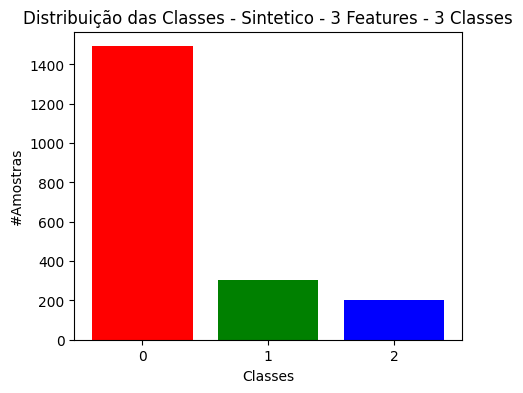

#######################################


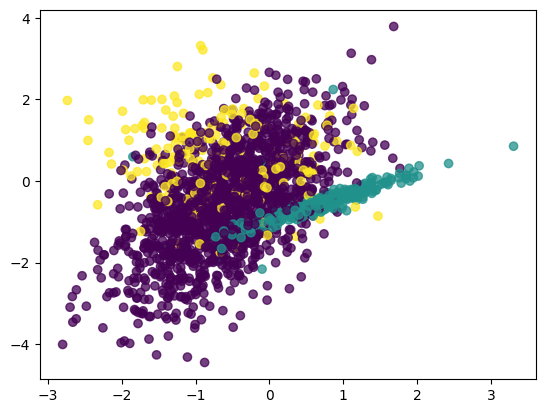

#######################################


In [9]:
class_weights = [0.75, 0.15 , 0.10]
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=0.6, random_state=12)

plot_dataset(X,y,dataset_name='Sintetico - 3 Features - 3 Classes')

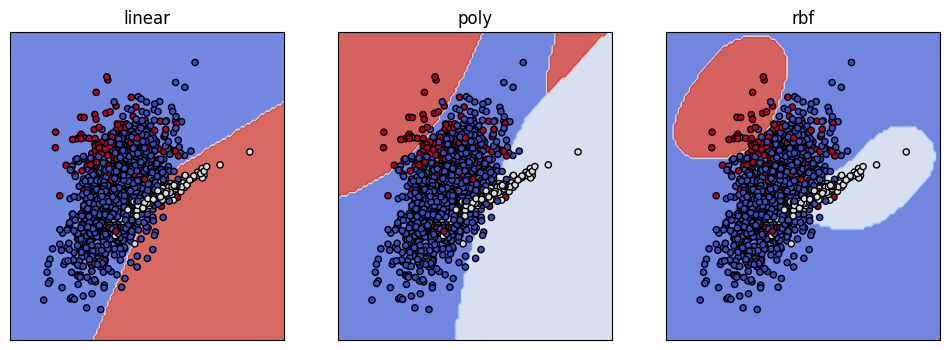

In [10]:
fig, sub = plt.subplots(1, 3, figsize=(12,4))

train_data, test_data, train_labels, test_labels = train_test_split(X,y)

svms = []
kernels = ['linear','poly','rbf']
#Treinando diferentes Kernels para o SVMs
for kernel in kernels:
    clf = SVM(C=1.0,kernel=kernel)
    clf.fit(train_data,train_labels)
    svms.append(clf)


X0, X1 = train_data[:,0],train_data[:,1]
for clf, kernel , ax in zip(svms, kernels, sub.flatten()):

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        train_data,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )

    ax.scatter(X0, X1, c=train_labels, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(kernel)

plt.show()






Analise as diferentes fronteiras criadas pelos Kernels. Abaixo verifique os desempenhos. O que se pode concluir?

In [11]:
for clf,kernel in zip(svms, kernels):
  print(f'#### Kernel: {kernel} ####')
  y_pred = clf.predict(test_data)
  print(classification_report(test_labels,y_pred))

#### Kernel: linear ####
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       375
           1       0.82      0.61      0.70        80
           2       0.00      0.00      0.00        45

    accuracy                           0.83       500
   macro avg       0.55      0.53      0.53       500
weighted avg       0.76      0.83      0.79       500

#### Kernel: poly ####
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       375
           1       0.84      0.39      0.53        80
           2       0.88      0.16      0.26        45

    accuracy                           0.82       500
   macro avg       0.84      0.51      0.56       500
weighted avg       0.82      0.82      0.78       500

#### Kernel: rbf ####
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       375
           1       0.80      0.75      0.77        80
     

c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
